In [265]:
import camb as camb
import numpy as np  
import matplotlib.pyplot as plt

In [266]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
print('Derived parameter dictionary: %s'%results.get_derived_params())
z = np.linspace(0.01,4,100)
mu=5. *np.log10(results.luminosity_distance(z))

Derived parameter dictionary: {'age': 13.740451258557629, 'zstar': 1090.5874293164493, 'rstar': 144.2080856997206, 'thetastar': 1.044624748465975, 'DAstar': 13.804774002481686, 'zdrag': 1059.2315319769964, 'rdrag': 146.98718126684082, 'kd': 0.14067147523242263, 'thetad': 0.16177616258859043, 'zeq': 3441.8515054149993, 'keq': 0.010503792217322724, 'thetaeq': 0.8079811528320672, 'thetarseq': 0.4469751339083145}


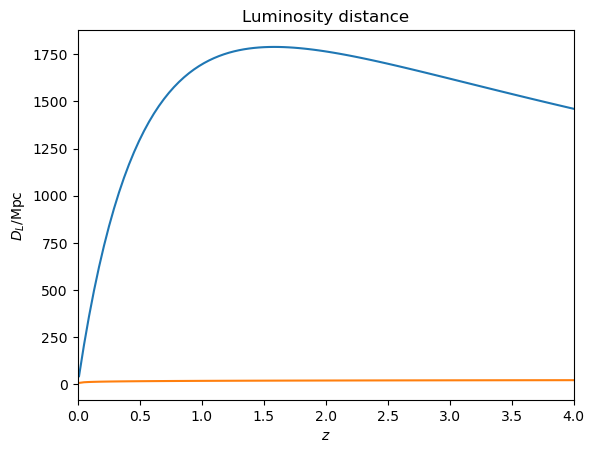

In [267]:

DA = results.angular_diameter_distance(z)
plt.plot(z, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_L /\rm{Mpc}$')
plt.title('Luminosity distance')
plt.xlim([0,4])
plt.plot(z,mu)

In [268]:


data= np.loadtxt('fit_exercise_data.txt')



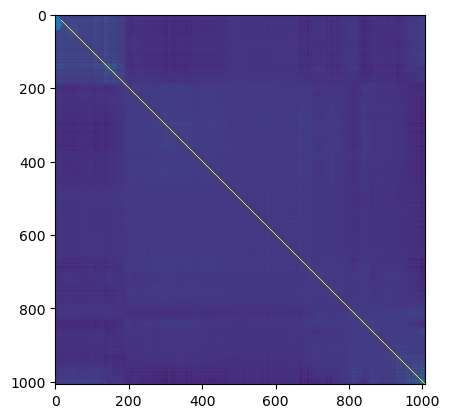

In [269]:
plt.plot(data[:,0],data[:,1],'o')
obs_z=data[:,0]
obs_mu=data[:,1]
covariance=np.loadtxt('fit_exercise_covariance.txt')
correlation = np.corrcoef(covariance)
plt.imshow(correlation, interpolation='nearest')


In [270]:
inv_cov = np.linalg.inv(covariance)


In [271]:
def likelihood(omegam):
    pars = camb.CAMBparams()    
    H0= 70.
    h= H0/100
    pars.set_cosmology(H0=H0, ombh2=omegam * h**2 * 0.15 , omch2=omegam * h**2 * 0.85)
    results = camb.get_background(pars)
    print('Derived parameter dictionary: %s'%results.get_derived_params())

    mu=5. *np.log10(results.luminosity_distance(obs_z))
    residuals = mu - obs_mu
    like = -0.5 * np.dot(residuals, np.dot(inv_cov, residuals ))
    ones = np.ones_like(residuals)
    temp2 = np.dot(ones, np.dot(inv_cov, ones))
    temp1 = np.dot(ones, np.dot(inv_cov, residuals))
    like += 0.5 * temp1**2 / temp2
    return like


                  

In [272]:
omegam_grid = np.linspace(0.1, 0.9, 1000)
likelihoods = np.array([likelihood(omegam) for omegam in omegam_grid])
likelihoods = likelihoods - np.amax(likelihoods)

Derived parameter dictionary: {'age': 17.77547610427018, 'zstar': 1120.8657920127428, 'rstar': 187.95935979279136, 'thetastar': 0.908742906605584, 'DAstar': 20.68344725736277, 'zdrag': 997.6080679017058, 'rdrag': 206.3839593842777, 'kd': 0.07997153269074898, 'thetad': 0.18992910859134798, 'zeq': 1170.525859481493, 'keq': 0.0035749099983219752, 'thetaeq': 1.584685981845254, 'thetarseq': 0.8772912785189336}
Derived parameter dictionary: {'age': 17.74279119528924, 'zstar': 1120.550681191872, 'rstar': 187.71784288991523, 'thetastar': 0.9102284374971199, 'DAstar': 20.623157347850846, 'zdrag': 998.0343015661434, 'rdrag': 205.97840533468406, 'kd': 0.08027233037152917, 'thetad': 0.18977056311485407, 'zeq': 1179.9074479458095, 'keq': 0.0036035254190579374, 'thetaeq': 1.5766944820357276, 'thetarseq': 0.8728671052154777}
Derived parameter dictionary: {'age': 17.71037787581415, 'zstar': 1120.2398475435284, 'rstar': 187.47678430383107, 'thetastar': 0.9116978863948341, 'DAstar': 20.563476904084812, 

Media 0.29825509407637446


/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_40467/1434183902.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  normalization = np.trapz(np.exp(likelihoods), omegam_grid)
/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_40467/1434183902.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  media = np.trapz(omegam_grid*posterior, omegam_grid)


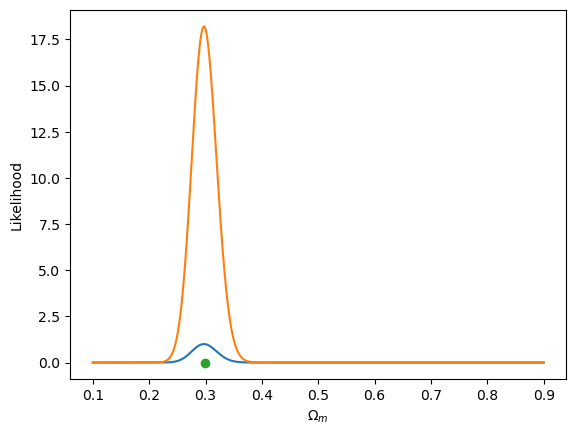

In [278]:
plt.plot(omegam_grid, np.exp(likelihoods))
plt.xlabel(r'$\Omega_m$')
plt.ylabel('Likelihood')

normalization = np.trapz(np.exp(likelihoods), omegam_grid)
posterior = np.exp(likelihoods)/normalization
plt.plot(omegam_grid, posterior)
plt.xlabel(r'$\Omega_m$')
media = np.trapz(omegam_grid*posterior, omegam_grid)
print('Media', media)
plt.plot(media, 0, 'o')